In [2]:
!pip install fastbook -q
!pip install timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 948.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from fastbook import *
from fastai.vision.widgets import *
import fastai
import timm
import shutil

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device
print('fastai verison:', fastai.__version__)
print('torch version:', torch.__version__)

fastai verison: 2.7.19
torch version: 2.6.0+cu124


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#set project name
project = 'demo20250225'

path = Path('/content/drive/MyDrive/dataset/'+project)

#Key is the name of classes; value is the keyword that which search engine uses for searching
keywords = {'Spodoptera frugiperda': '草地貪夜蛾', 'Schistocerca gregaria': '沙漠蝗蟲', 'Thysanoptera': '薊馬', 'Chilo suppressalis': '二化螟蟲', 'Sogata furcifera': '白背飛虱'}
array = keywords.items()


project_folder = f'/content/drive/MyDrive/dataset/{project}'

In [7]:
if not path.exists():
    !mkdir -p {project_folder}
else:
    print('The Project Folder exists; it will be removed and created again.')
    shutil.rmtree(project_folder)
    !mkdir -p {project_folder}

#網路爬蟲下載圖片
for key,value in array:
    print(key,value)
    dest = (path/key)
    dest.mkdir(exist_ok=True)
    urls = search_images_ddg(f' {value}',max_images=100)
    download_images(dest, urls=urls)

The Project Folder exists; it will be removed and created again.
Spodoptera frugiperda 草地貪夜蛾
Schistocerca gregaria 沙漠蝗蟲
Thysanoptera 薊馬
Chilo suppressalis 二化螟蟲
Sogata furcifera 白背飛虱


In [8]:
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink) #unlink broken images

(#1) [None]

In [13]:
path = Path('/content/drive/MyDrive/dataset/demo20250225/')
path.ls()

(#5) [Path('/content/drive/MyDrive/dataset/demo20250225/Spodoptera frugiperda'),Path('/content/drive/MyDrive/dataset/demo20250225/Schistocerca gregaria'),Path('/content/drive/MyDrive/dataset/demo20250225/Thysanoptera'),Path('/content/drive/MyDrive/dataset/demo20250225/Chilo suppressalis'),Path('/content/drive/MyDrive/dataset/demo20250225/Sogata furcifera')]

In [14]:
myPath='/content/drive/MyDrive/dataset/models'
!mkdir -p $myPath

In [24]:
from fastai.data.transforms import RandomSplitter
from fastai.vision.all import *
import random

# 設定資料集路徑
path = Path('/content/drive/MyDrive/dataset')

# 取得所有圖片檔案
all_files = get_image_files(path)

# 確保總數量正確
total_size = len(all_files)
print(f"總圖片數量: {total_size}")

# 使用 RandomSplitter 將 80% 作為訓練集，20% 作為驗證集
splitter = RandomSplitter(valid_pct=0.2, seed=42)

dataset = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=splitter,
    item_tfms=Resize(224),
    get_y=parent_label
)

# 創建 DataLoaders
dls = dataset.dataloaders(path, bs=16, num_workers=8)

# 確認訓練集與驗證集數量
train_files = dls.train_ds.items
valid_files = dls.valid_ds.items
train_size = len(train_files)
valid_size = len(valid_files)


# 將原本的驗證集重新分為一半用作測試集
test_size = valid_size // 2
test_files = random.sample(valid_files, test_size)
valid_files = [f for f in valid_files if f not in test_files]

# 創建測試集 DataLoader
test_dl = dls.test_dl(test_files)

# 更新驗證集 DataLoader
valid_dl = dls.test_dl(valid_files)

# 確認新的數據集分割
print(f"訓練集: {len(dls.train_ds)} 張圖片")
print(f"驗證集: {len(valid_dl.dataset)} 張圖片")
print(f"測試集: {len(test_dl.dataset)} 張圖片")

# 確保所有數據總和等於原始數據量
assert len(dls.train_ds) + len(valid_dl.dataset) + len(test_dl.dataset) == total_size, "分割後數量與總數不匹配！"


# 確保資料沒有重疊
assert len(set(train_files) & set(valid_files)) == 0, "訓練集與驗證集有重疊！"
assert len(set(train_files) & set(test_files)) == 0, "訓練集與測試集有重疊！"
assert len(set(valid_files) & set(test_files)) == 0, "驗證集與測試集有重疊！"



總圖片數量: 502
訓練集: 402 張圖片
驗證集: 50 張圖片
測試集: 50 張圖片


訓練資料


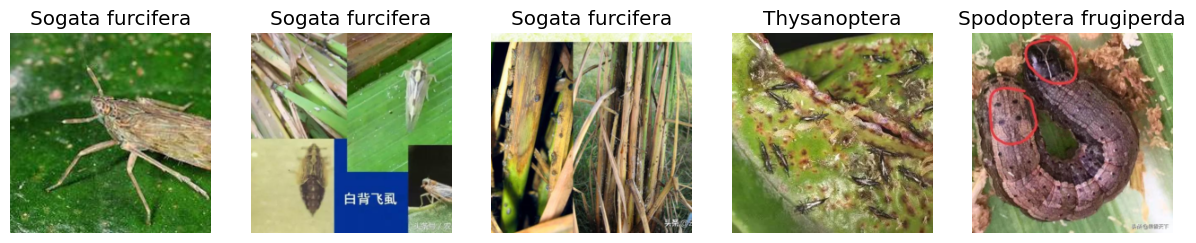

In [28]:
print('訓練資料')
dls.show_batch(max_n=5, nrows=1)

In [29]:
timm.list_models()

['aimv2_1b_patch14_224',
 'aimv2_1b_patch14_336',
 'aimv2_1b_patch14_448',
 'aimv2_3b_patch14_224',
 'aimv2_3b_patch14_336',
 'aimv2_3b_patch14_448',
 'aimv2_huge_patch14_224',
 'aimv2_huge_patch14_336',
 'aimv2_huge_patch14_448',
 'aimv2_large_patch14_224',
 'aimv2_large_patch14_336',
 'aimv2_large_patch14_448',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_large_patch16_224',
 'botnet26t_256',
 'botnet50ts_256',
 'caformer_b36',
 'caformer_m36',
 'caformer_s18',
 'caformer_s36',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_medium',
 'coat_lite_medium_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_small',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coa

In [30]:
timm.list_models('*dense*')

['densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenet264d',
 'densenetblur121d']


 開始訓練模型：resnet34


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 26.3MB/s]


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.890317,0.856622,0.760000,0.240000,03:32
1,1.183248,0.722578,0.810000,0.190000,02:26
2,0.874961,0.699462,0.790000,0.210000,02:21


 匯出模型：resnet34_stage-1.pkl


  Minimum/10: 1.10e-07, Steepest: 9.12e-07


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.559756,0.848238,0.800000,0.200000,03:52
1,0.527398,0.928051,0.760000,0.240000,03:27
2,0.525547,0.763467,0.790000,0.210000,03:28
3,0.416065,0.753491,0.780000,0.220000,03:25
4,0.331495,0.808882,0.800000,0.200000,03:28
5,0.251712,0.815693,0.800000,0.200000,03:29


 模型 resnet34 訓練完成並匯出至 resnet34_stage-1.pkl

 開始訓練模型：resnet50


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 132MB/s]


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.889862,0.742729,0.730000,0.270000,03:25
1,1.192871,0.641584,0.830000,0.170000,03:22
2,0.797326,0.646229,0.800000,0.200000,03:23


 匯出模型：resnet50_stage-1.pkl


  Minimum/10: 5.75e-05, Steepest: 2.29e-06


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.473728,0.507735,0.810000,0.190000,04:45
1,0.389651,0.717960,0.760000,0.240000,04:44
2,0.294971,0.520669,0.820000,0.180000,04:41
3,0.235410,0.517886,0.800000,0.200000,04:45
4,0.226140,0.493569,0.810000,0.190000,04:44
5,0.170189,0.520973,0.820000,0.180000,04:38


 模型 resnet50 訓練完成並匯出至 resnet50_stage-1.pkl

 開始訓練模型：efficientnet_b0


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 83.5MB/s]


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.204930,0.584493,0.770000,0.230000,01:21
1,1.408555,0.603019,0.800000,0.200000,01:27
2,0.968732,0.586542,0.800000,0.200000,01:26


 匯出模型：efficientnet_b0_stage-1.pkl


  Minimum/10: 4.79e-07, Steepest: 7.59e-07


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.588702,0.530668,0.810000,0.190000,01:47
1,0.532512,0.635366,0.830000,0.170000,01:58
2,0.442517,0.609658,0.830000,0.170000,01:52
3,0.379484,0.630444,0.780000,0.220000,01:52
4,0.319929,0.630430,0.790000,0.210000,01:56
5,0.252452,0.590629,0.830000,0.170000,01:50


 模型 efficientnet_b0 訓練完成並匯出至 efficientnet_b0_stage-1.pkl

Evaluating resnet34...


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


resnet34 準確率：0.8600


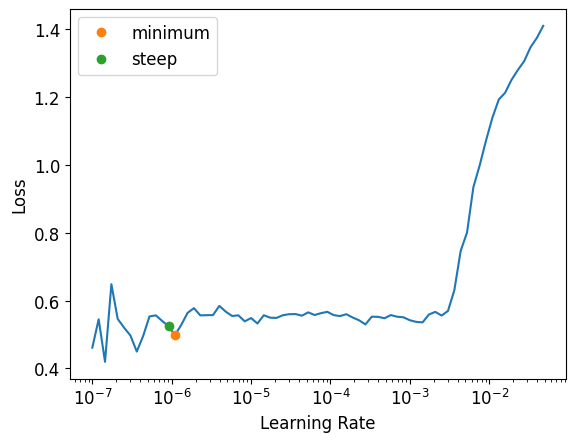

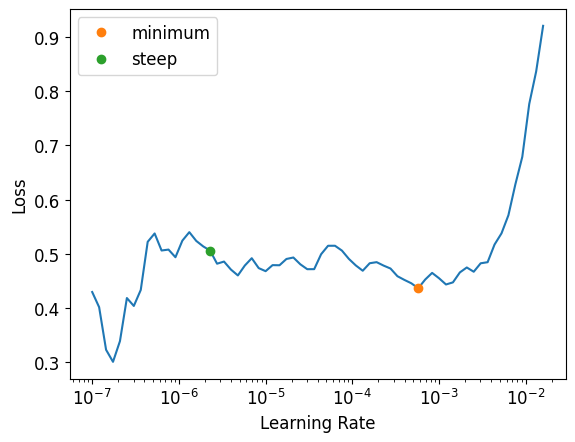

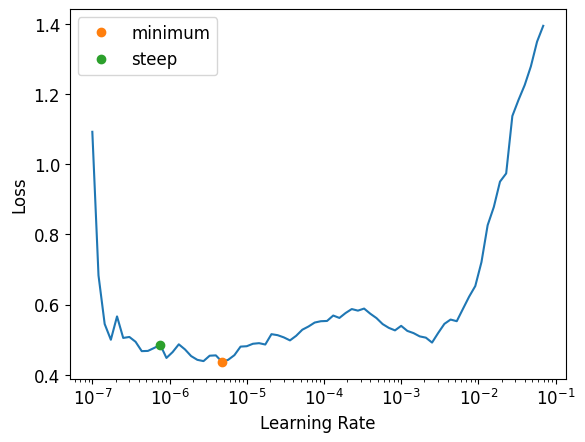

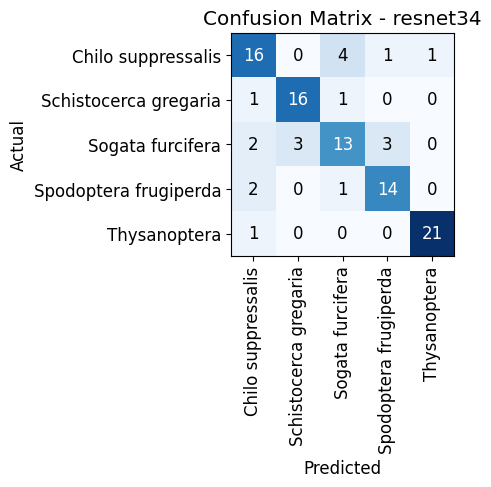

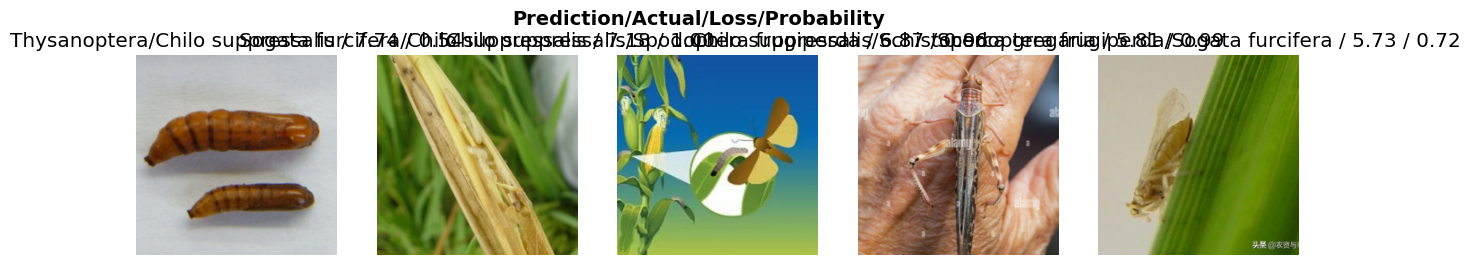

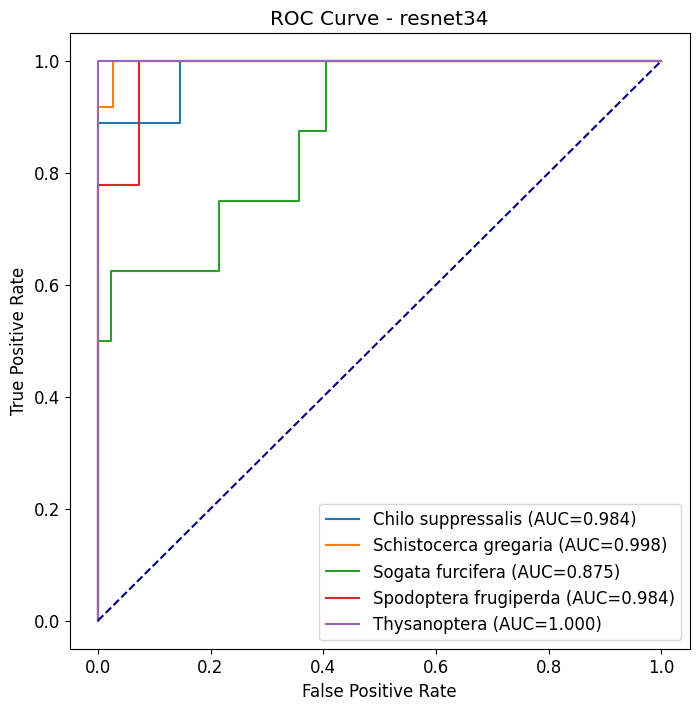


 Classification Report for resnet34:
                       precision    recall  f1-score   support

   Chilo suppressalis       0.80      0.89      0.84         9
Schistocerca gregaria       1.00      0.92      0.96        12
     Sogata furcifera       0.62      0.62      0.62         8
Spodoptera frugiperda       0.78      0.78      0.78         9
         Thysanoptera       1.00      1.00      1.00        12

             accuracy                           0.86        50
            macro avg       0.84      0.84      0.84        50
         weighted avg       0.86      0.86      0.86        50


Evaluating resnet50...


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


resnet50 準確率：0.8400


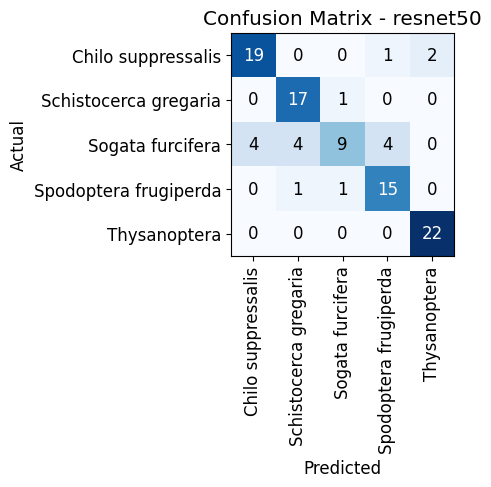

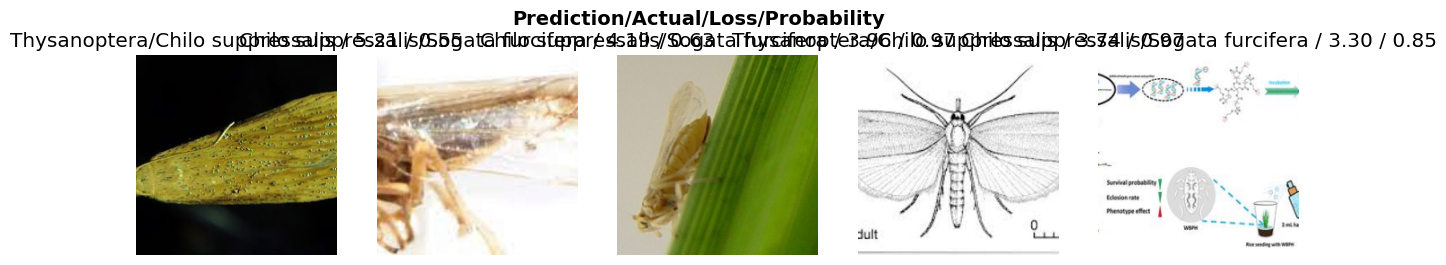

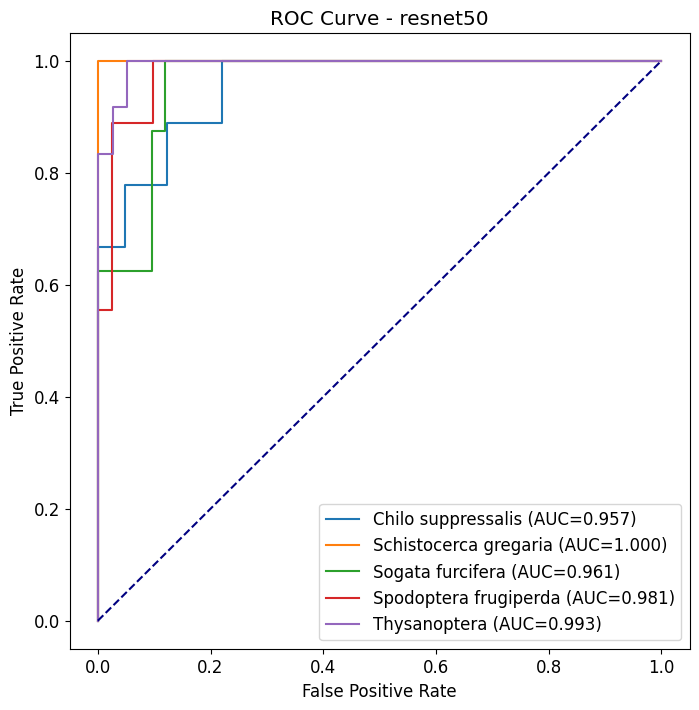


 Classification Report for resnet50:
                       precision    recall  f1-score   support

   Chilo suppressalis       0.78      0.78      0.78         9
Schistocerca gregaria       0.86      1.00      0.92        12
     Sogata furcifera       1.00      0.38      0.55         8
Spodoptera frugiperda       0.80      0.89      0.84         9
         Thysanoptera       0.86      1.00      0.92        12

             accuracy                           0.84        50
            macro avg       0.86      0.81      0.80        50
         weighted avg       0.86      0.84      0.82        50


Evaluating efficientnet_b0...


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


efficientnet_b0 準確率：0.9200


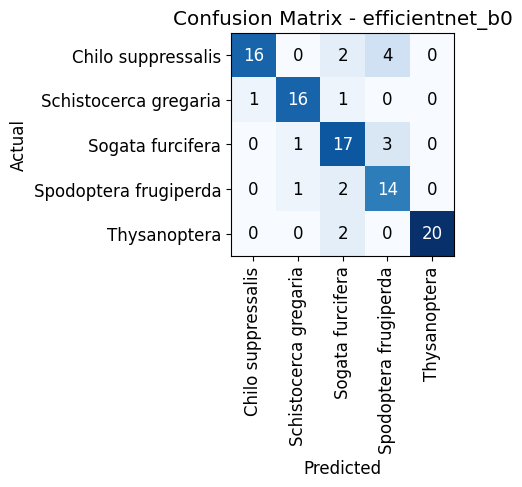

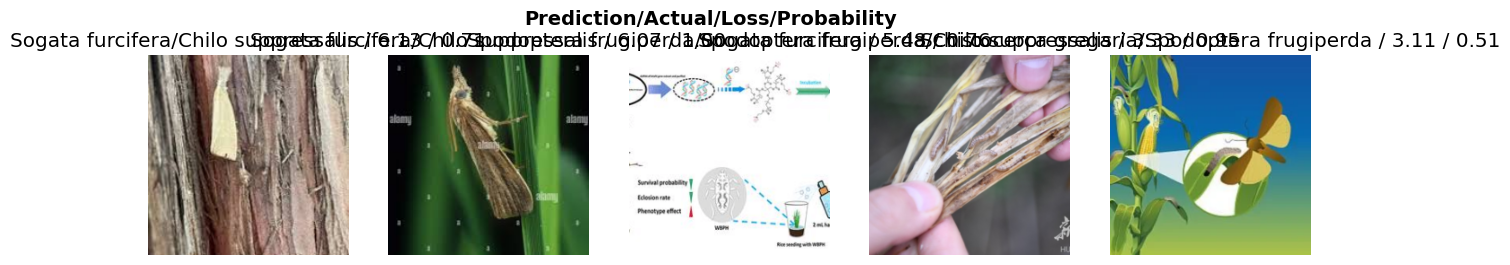

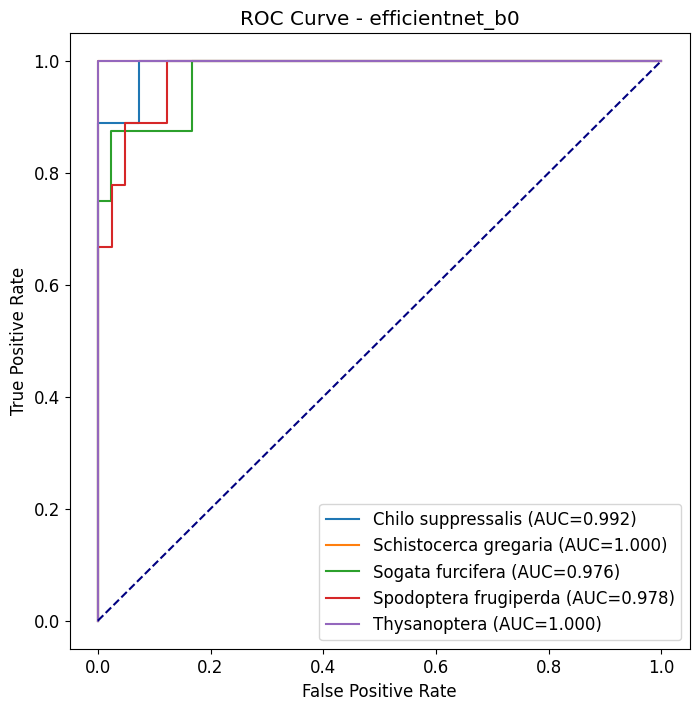


 Classification Report for efficientnet_b0:
                       precision    recall  f1-score   support

   Chilo suppressalis       1.00      0.89      0.94         9
Schistocerca gregaria       1.00      1.00      1.00        12
     Sogata furcifera       0.78      0.88      0.82         8
Spodoptera frugiperda       0.80      0.89      0.84         9
         Thysanoptera       1.00      0.92      0.96        12

             accuracy                           0.92        50
            macro avg       0.92      0.91      0.91        50
         weighted avg       0.93      0.92      0.92        50



In [31]:
from fastai.vision.all import *
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

#  訓練並匯出模型函式
def train_and_export_models(dls, model_list, save_path):
    for model_arch in model_list:
        print(f"\n 開始訓練模型：{model_arch.__name__}")
        learn = vision_learner(dls, model_arch, metrics=[accuracy, error_rate], pretrained=True)
        learn.fit_one_cycle(3, 1e-3)

        stage1_name = f"{model_arch.__name__}_stage-1.pkl"
        learn.export(save_path / stage1_name)
        print(f" 匯出模型：{stage1_name}")

        learn.unfreeze()
        lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))
        print(f"  Minimum/10: {lr_min:.2e}, Steepest: {lr_steep:.2e}")

        learn.fit_one_cycle(6, lr_max=2.5e-4)
        learn.export(save_path / stage1_name)
        print(f" 模型 {model_arch.__name__} 訓練完成並匯出至 {stage1_name}")

#  模型測試與報告函式
def evaluate_models(dls, test_files, model_list, model_path):
    test_dl = dls.test_dl(test_files, with_labels=True)

    for model_arch in model_list:
        print(f"\nEvaluating {model_arch.__name__}...")
        model_file = model_path / f"{model_arch.__name__}_stage-1.pkl"

        if not model_file.exists():
            print(f" 模型檔案 '{model_file}' 不存在，略過。")
            continue

        learn = load_learner(model_file)
        learn.dls = dls  # 綁定 dls 確保能正常解析 vocab

        preds, y = learn.get_preds(dl=test_dl)

        acc = accuracy(preds, y).item()
        print(f"{model_arch.__name__} 準確率：{acc:.4f}")

        # 混淆矩陣
        interp = ClassificationInterpretation.from_learner(learn)
        interp.plot_confusion_matrix(title=f'Confusion Matrix - {model_arch.__name__}')
        interp.plot_top_losses(5, nrows=1)

        # ROC 曲線
        plt.figure(figsize=(8, 8))
        for i in range(len(dls.vocab)):
            fpr, tpr, _ = roc_curve(y, preds[:, i], pos_label=i)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{dls.vocab[i]} (AUC={roc_auc:.3f})')
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_arch.__name__}')
        plt.legend()
        plt.show()

        # 分類報告
        print(f"\n Classification Report for {model_arch.__name__}:")
        print(classification_report(y, preds.argmax(dim=1), target_names=dls.vocab))


model_path = Path('/content/drive/MyDrive/dataset/models')
models_to_use = [resnet34, resnet50, efficientnet_b0]

#  訓練模型
train_and_export_models(dls, models_to_use, model_path)

#  測試模型與產生報告
evaluate_models(dls, test_files, models_to_use, model_path)




In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # Import necessary functions
from fastai.vision.all import * # Import all from fastai.vision.all, including load_learner

# 函數來計算指標
def calculate_metrics(learn, model, test_files):
    test_dl = learn.dls.test_dl(test_files, with_labels=True)  # with_labels=True is crucial
    preds, y_true, loss = model.get_preds(dl=test_dl, with_loss=True)
    y_pred = preds.argmax(dim=1)  # 取得預測類別

    # 計算 Accuracy
    acc = accuracy_score(y_true.cpu().numpy(), y_pred.cpu().numpy())  # Call .item() to get a Python number

    # 計算 Precision, Recall, F1-Score
    precision_micro = precision_score(y_true.cpu().numpy(), y_pred.cpu().numpy(), average='micro')
    precision_macro = precision_score(y_true.cpu().numpy(), y_pred.cpu().numpy(), average='macro')
    recall_micro = recall_score(y_true.cpu().numpy(), y_pred.cpu().numpy(), average='micro')
    recall_macro = recall_score(y_true.cpu().numpy(), y_pred.cpu().numpy(), average='macro')
    f1_micro = f1_score(y_true.cpu().numpy(), y_pred.cpu().numpy(), average='micro')
    f1_macro = f1_score(y_true.cpu().numpy(), y_pred.cpu().numpy(), average='macro')

    # 計算 Weighted AUC 和 Macro AUC
    auc_weighted = roc_auc_score(y_true.cpu().numpy(), preds.cpu().numpy(), average='weighted', multi_class='ovr')
    auc_macro = roc_auc_score(y_true.cpu().numpy(), preds.cpu().numpy(), average='macro', multi_class='ovr')

    # 返回指標結果
    return {
        'Accuracy': acc,
        'Micro Precision': precision_micro,
        'Macro Precision': precision_macro,
        'Micro Recall': recall_micro,
        'Macro Recall': recall_macro,
        'Micro F1-Score': f1_micro,
        'Macro F1-Score': f1_macro,
        'Weighted AUC': auc_weighted,
        'Macro AUC': auc_macro
    }

# 假設 model1, model2, model3 是三個不同的模型, 从保存的模型文件加载 Learner 对象
model_path = Path('/content/drive/MyDrive/dataset/models') # Define model_path
model1 = load_learner(model_path / 'resnet34_stage-1.pkl') # Load model1
model2 = load_learner(model_path / 'resnet50_stage-1.pkl') # Load model2
model3 = load_learner(model_path / 'efficientnet_b0_stage-1.pkl') # Load model3


model1_results = calculate_metrics(model1, model1, test_files) # Pass model1 as the first argument
model2_results = calculate_metrics(model2, model2, test_files) # Pass model2 as the first argument
model3_results = calculate_metrics(model3, model3, test_files) # Pass model3 as the first argument

# 顯示每個模型的結果
def display_results(model_name, results):
    print(f"\n{model_name} Results:")
    for metric, value in results.items():
        print(f"{metric}: {value:.4f}")

# 顯示模型1的結果
display_results("Model 1", model1_results)
# 顯示模型2的結果
display_results("Model 2", model2_results)
# 顯示模型3的結果
display_results("Model 3", model3_results)

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")



Model 1 Results:
Accuracy: 0.8600
Micro Precision: 0.8600
Macro Precision: 0.8406
Micro Recall: 0.8600
Macro Recall: 0.8417
Micro F1-Score: 0.8600
Macro F1-Score: 0.8403
Weighted AUC: 0.9736
Macro AUC: 0.9681

Model 2 Results:
Accuracy: 0.8400
Micro Precision: 0.8400
Macro Precision: 0.8584
Micro Recall: 0.8400
Macro Recall: 0.8083
Micro F1-Score: 0.8400
Macro F1-Score: 0.8023
Weighted AUC: 0.9810
Macro AUC: 0.9785

Model 3 Results:
Accuracy: 0.9200
Micro Precision: 0.9200
Macro Precision: 0.9156
Micro Recall: 0.9200
Macro Recall: 0.9139
Micro F1-Score: 0.9200
Macro F1-Score: 0.9127
Weighted AUC: 0.9908
Macro AUC: 0.9893


In [34]:
from fastai.vision.all import *
from torchvision.transforms.functional import to_tensor
import matplotlib.pyplot as plt
import torch

# 假設這是你已經有的 test_dl 及模型路徑
model_path = Path('/content/drive/MyDrive/dataset/models')

In [38]:
# 只選擇 efficientnet_b0 模型
model_name = 'efficientnet_b0_stage-1.pkl'  # 指定 efficientnet_b0 模型文件名稱 #Corrected file name
model_file = model_path / model_name  # 確保使用 efficientnet_b0 模型

In [39]:
# 載入 efficientnet_b0 模型
learn = load_learner(model_file)

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [40]:
# 使用測試集中的第一張圖片
test_img = test_dl.items[0]
x_dec = PILImage.create(test_img)

In [41]:
# 使用與訓練時相同的大小調整方式
rsz = Resize(224, method=ResizeMethod.Pad, pad_mode=PadMode.Zeros)
x_dec = rsz(x_dec)
x = to_tensor(x_dec)
x.unsqueeze_(0)  # 加上 batch 維度

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])

In [42]:

# 定義 Hook 用來監聽反向傳播梯度
class Hook:
    def __init__(self, m):
        self.hook = m.register_forward_hook(self.hook_func)
    def hook_func(self, m, i, o):
        self.stored = o.detach().clone()
    def __enter__(self, *args):
        return self
    def __exit__(self, *args):
        self.hook.remove()

In [43]:

class HookBwd:
    def __init__(self, m):
        # 使用 register_backward_hook 註冊 backward hook
        self.hook = m.register_backward_hook(self.hook_func)
    def hook_func(self, m, gi, go):
        self.stored = go[0].detach().clone()
    def __enter__(self, *args):
        return self
    def __exit__(self, *args):
        self.hook.remove()

In [44]:
# 訓練過程中的 Hook 和梯度計算
with HookBwd(learn.model[0]) as hookg:
    with Hook(learn.model[0]) as hook:
        output = learn.model.eval()(x.cpu())  # 使用測試集圖片進行預測
        act = hook.stored
        cls = 1  # 指定要查看的類別
        output[0, cls].backward()  # 計算梯度
        grad = hookg.stored


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1830: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


In [45]:
# 計算 Grad-CAM
w = grad[0].mean(dim=[1, 2], keepdim=True)
cam_map = (w * act[0]).sum(0)

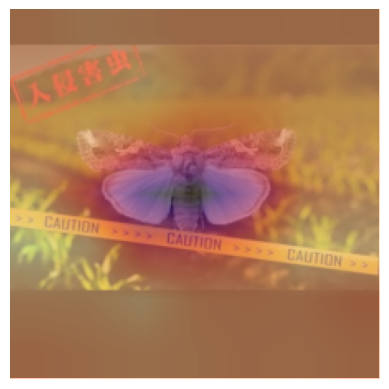

In [46]:
# 顯示原始圖片與 Grad-CAM 視覺化結果
_, ax = plt.subplots()
x_dec.show(ctx=ax)
ax.imshow(cam_map.detach().cpu(), alpha=0.6, extent=(0, 224, 224, 0),
          interpolation='bilinear', cmap='magma')
plt.show()
